Task-1 Titanic survival prediction

Author : Sarthak Mujumdar

 Batch  : May

 Domain : Data Science

Goal   : To build a model that predicts whether a passenger on the Titanic survived or not

In [8]:
# Importing imp libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [9]:
# Upload and use Titanic dataset from kaggle

df = pd.read_csv(r"C:\Users\Sarthak\Desktop\INTERNSHIP\DATASET\Titanic-Dataset.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# check the rows and columns in Dataset

df.shape

(891, 12)

In [11]:
# statistic data of the dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Check the number of passangers survived

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

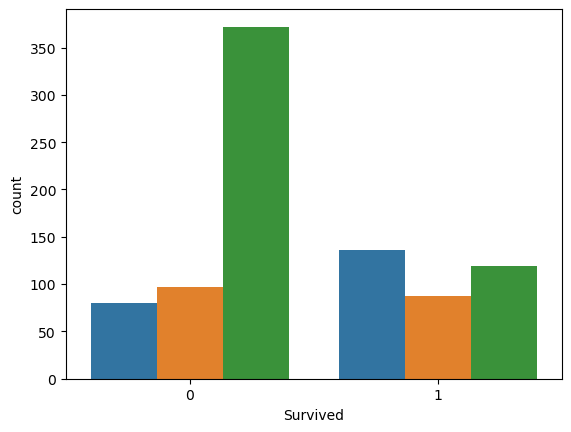

In [13]:
# Check and plot graph on basis of parameters as survived and passanger class

sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [14]:
# Check the Gender 

df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [15]:
# Calculate the statistic mean on basis of gender for survived passangers

df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
# Identify unique gender available in the dataset

df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
# Changing the gender values in dataset with the help of label encoder
# Male = 1
# Female = 0

label_encoder = LabelEncoder() 
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# again Check the gender and survival of passengers and get insights

df['Sex'],df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

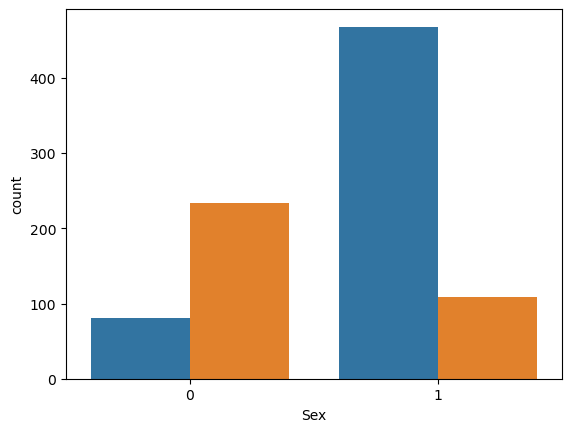

In [19]:
# Plot the graph on basis of gender and survival
# Check for null values in Dataset

sns.countplot(x=df['Sex'], hue=df['Survived'])
df.isna().sum()

In [20]:
# remove the age column as it consists null values and isnt suitable to be considered as a parameter to predict
df=df.drop(['Age'],axis=1)

In [21]:
# Finalizing the dataset for prediction and model training

df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C


In [22]:
# splitting the dataset into the train testing 

x=df[['Pclass','Sex']]
y=df['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
# calculate the logistic regression for predection

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [24]:
# predict on basisc of logistic regression on test X

pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [25]:
# display of Y test

print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [26]:
# Finalizing Model on Base of passanger class and  gender

import warnings
warnings.filterwarnings("ignore")

res= log.predict([[1,0]])
if(res==0):
    print("! Not Surived")
else:
    print("Survived")

Survived
